In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from collections import deque
import random
import torch
import torch.optim as optim 
from torch import nn
from torch.nn import Linear, ReLU, CrossEntropyLoss, Sequential, Conv2d, MaxPool2d, Module, Softmax, BatchNorm2d, Dropout
from torch.optim import Adam, SGD
import gym
import matplotlib.pyplot as plt
from Environment import *
from experience_replay import *
from brain import *
from agent import *
from Hyperparameters import *

In [ ]:
!pip install gym pyvirtualdisplay > /dev/null 2>&1
!apt-get install -y xvfb python-opengl ffmpeg > /dev/null 2>&1
!apt-get update > /dev/null 2>&1
!apt-get install cmake > /dev/null 2>&1
!pip install --upgrade setuptools 2>&1
!pip install ez_setup > /dev/null 2>&1
!pip install gym[atari] > /dev/null 2>&1

In [ ]:
from IPython.display import HTML
from pyvirtualdisplay import Display
from IPython import display as ipythondisplay

display = Display(visible=0, size=(1400, 900))
display.start()


In [ ]:
!wget http://www.atarimania.com/roms/Roms.rar
!unrar e Roms.rar
!unzip ROMS.zip 
!unzip HCROMS.zip
!python -m atari_py.import_roms ROMS

In [ ]:
img = env.reset()
plt.figure(figsize=(12,12))

plt.imshow(img[32:193,8:150,0],'gray')

In [ ]:
def preprocessing(current_state,game):
  if game == 'pong':
    current_state = current_state[41:190,15:145,0] 
    current_state = cv2.resize(current_state,(param.IMAGESIZE[0], param.IMAGESIZE[1]))/255
    return current_state 
  elif game == 'breakout':
    current_state = current_state[32:193,8:150,0]
    current_state = cv2.resize(current_state,(param.IMAGESIZE[0], param.IMAGESIZE[1]))/255
    return current_state

In [ ]:
from torch._C import dtype
rewards = collections.deque(maxlen=20)

param = Hyperparameters()
env = gym.make('Pong-v4')
agent = Agent()
# agent.loadKnowlage('best')

##########################
agent.param.THRESH_START_DECAY = 20
param.EPISODE_NUM = 300
param.ITER_NUM = 300

##########################


for itr in range(param.ITER_NUM):

  stacked_frames = deque(maxlen=param.CHANNEL_NUM)
  current_frame = env.reset()
  current_frame = preprocessing(current_frame,'pong') 
  stacked_frames.append(current_frame) 
  stacked_frames.append(current_frame) 
  stacked_frames.append(current_frame) 
  stacked_frames.append(current_frame) 
  current_state = torch.from_numpy(np.stack(stacked_frames,axis=0)).float()
  done = False

  for eps in range(param.EPISODE_NUM):

    action = agent.find_action(current_state)
    new_frame, reward, done,_= env.step(action)
    new_frame = preprocessing(new_frame,'pong')
    stacked_frames.append(new_frame)
    new_state = torch.from_numpy(np.stack(stacked_frames,axis=0)).float()
    agent.update_weights([current_state.clone(),action,reward,done,new_state])
    current_state = new_state.clone()
    if reward == 1:
      print(f'iteration: {itr}, episode: {eps}, last_reward: {reward}, epsilon: {agent.epsilon}, action: {action}')
    # state = env.reset()
    agent.reset()
    if done:
      break
            
    agent.saveKnowlage("best")


/content/agent.py:40: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  state = torch.tensor(state).unsqueeze(0).to(self.device)


iteration: 2, episode: 200, last_reward: 1.0, epsilon: 0.8, action: 2
iteration: 3, episode: 237, last_reward: 1.0, epsilon: 0.8, action: 4
iteration: 7, episode: 190, last_reward: 1.0, epsilon: 0.8, action: 0
iteration: 10, episode: 180, last_reward: 1.0, epsilon: 0.8, action: 1
iteration: 12, episode: 239, last_reward: 1.0, epsilon: 0.8, action: 0


In [ ]:
!sudo apt-get install xvfb
!pip install xvfbwrapper

In [ ]:
import gym
from gym.wrappers import Monitor
import glob
import io
import base64
from IPython.display import HTML
from pyvirtualdisplay import Display
from IPython import display as ipythondisplay

display = Display(visible=0, size=(1400, 900))
display.start()

def show_video():
  mp4list = glob.glob('video/*.mp4')
  if len(mp4list) > 0:
    mp4 = mp4list[0]
    video = io.open(mp4, 'r+b').read()
    encoded = base64.b64encode(video)
    ipythondisplay.display(HTML(data='''<video alt="test" autoplay 
                loop controls style="height: 400px;">
                <source src="data:video/mp4;base64,{0}" type="video/mp4" />
             </video>'''.format(encoded.decode('ascii'))))
  else: 
    print("Could not find video")
    

def wrap_env(env):
  env = Monitor(env, './video', force=True)
  return env

In [ ]:
env = wrap_env(gym.make("Breakout-v0"))
observation = env.reset()
agent = Agent()
agent.epsilon = 0

agent.loadKnowlage('best.dat')

for itr in range(10):

  stacked_frames = deque(maxlen=param.CHANNEL_NUM)
  current_frame = env.reset()
  current_frame = preprocessing(current_frame,'breakout') 
  stacked_frames.append(current_frame) 
  stacked_frames.append(current_frame) 
  stacked_frames.append(current_frame) 
  stacked_frames.append(current_frame) 
  current_state = torch.from_numpy(np.stack(stacked_frames,axis=0)).float()
  done = False

  while True:
    
    env.render()
    action = agent.find_action(current_state)
    new_frame, reward, done,_= env.step(action)
    new_frame = preprocessing(new_frame,'breakout')
    stacked_frames.append(new_frame)
    new_state = torch.from_numpy(np.stack(stacked_frames,axis=0)).float()
    current_state = new_state.clone()

    if done: 
      break
            
env.close()
show_video()

OSError: ignored

In [ ]:
env = gym.make('Breakout-v0')


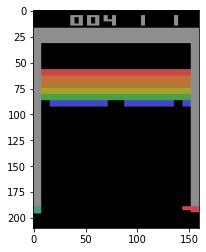

In [ ]:
plt.imshow(next)

In [ ]:
mainNet = DQN()

In [ ]:
torch.save(mainNet.state_dict(), 'ali')


In [ ]:
mainNet.load_state_dict(torch.load('ali'))


<All keys matched successfully>

In [ ]:
mainNet.load_state_dict(torch.load('best.dat'))


OSError: ignored